In [1]:
import yaml

# 打开并读取YAML文件
with open('in.yaml', 'r') as file:
    idata = yaml.safe_load(file)
# data = yaml.safe_load("in.yaml")
print(idata)



{'project_name': 'TNT', 'ini_engine': 'ase', 'ini_ase_ensemble_files': ['/workplace/liuzf/code/nepactive/example/prep/run_npt.py', '/workplace/liuzf/code/nepactive/example/prep/run_npt.py'], 'python_interpreter': '/workplace/liuzf/miniforge3/envs/mattersim/bin/python', 'ini_frames': 10, 'training_ratio': 0.8, 'pot_file': '/workplace/liuzf/ase/n5/30GPa300/best_model.pth', 'nep_template': '/workplace/liuzf/code/nepactive/example/prep/nep.in', 'pot_number': 4, 'model_devi': [{'id': 0, 'gpumd_template': ['/workplace/liuzf/code/nepactive/example/prep/run.in', '/workplace/liuzf/code/nepactive/example/prep/run.in'], 'xyz_file': '/workplace/liuzf/code/nepactive/example/prep/model.xyz'}, {'id': 1, 'gpumd_template': ['/workplace/liuzf/code/nepactive/example/prep/run.in', '/workplace/liuzf/code/nepactive/example/prep/run.in'], 'xyz_file': '/workplace/liuzf/code/nepactive/example/prep/model.xyz'}, {'id': 2, 'gpumd_template': ['/workplace/liuzf/code/nepactive/example/prep/run.in', '/workplace/liuzf

In [2]:
from nepactive.remote import traj2tasks
import os
os.chdir("/workplace/liuzf/code/nepactive/example/iter.000001/02.label")
os.getcwd()

'/workplace/liuzf/code/nepactive/example/iter.000001/02.label'

In [4]:
traj2tasks()

In [29]:
import paramiko
import os
ssh = paramiko.SSHClient()
paramiko.util.log_to_file('paramiko.log')  # 记录日志到文件
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy)
# key_filename = idata.get('ssh_key_filename')
hostname = idata.get('ssh_hostname')
port = idata.get('ssh_port')
username = idata.get('ssh_username')
# timeout = idata.get('ssh_timeout')
key_filename = os.path.expanduser("~/.ssh/id_ecdsa")
password = "Hc@2022121"
print(key_filename)
print(hostname)
print(port)
print(username)
# 启用调试日志
paramiko.util.log_to_file('paramiko.log')

# 尝试连接

ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect(
    hostname=hostname,
    port=port,
    username=username,
    # password=password,
    # key_filename = key_filename,
    timeout=60,
    compress=True,
    allow_agent=False, 
    look_for_keys=True
)


/home/liuzf/.ssh/id_ecdsa
ssh.cn-zhongwei-1.paracloud.com
22
sch9797@BSCC-T6


In [7]:
os.getcwd()

'/workplace/liuzf/code/nepactive/example'

In [1]:
subret = ['Submitted batch job 22760712\n']
print(f"subret:{subret}")

# 提取 job_id
job_id = subret[0].split()[-1].strip()
print(f"job_id:{job_id}")


subret:['Submitted batch job 22760712\n']
job_id:22760712


In [2]:
for i in range(4):
    print(i)

0
1
2
3


In [2]:
all_dict = {}
all_dict["test"] = 1
all_dict.keys()

dict_keys(['test'])

In [ ]:
with open('in.yaml', 'r') as file:
    data = yaml.safe_load(file)

model_devi:dict = idata["model_devi"][self.ii]

In [4]:
npt_template = """
potential		nep.txt

minimize sd 1.0e-6 10000

time_step	    {time_step}
velocity		{temperature}

ensemble        npt_ber {temperature} {temperature} 200 {pressure} {pressure} {pressure} 50 50 50 1000

dump_thermo		{dump_freq}
dump_exyz       {dump_freq}
run			    {run_steps}
"""

# 第一阶段，填充一些常用变量
general_text = npt_template.replace("{time_step}", "0.5")
general_text = general_text.replace("{run_steps}", "5000")
general_text = general_text.replace("{dump_freq}", "100")

print(general_text)



potential		nep.txt

minimize sd 1.0e-6 10000

time_step	    0.5
velocity		{temperature}

ensemble        npt_ber {temperature} {temperature} 200 {pressure} {pressure} {pressure} 50 50 50 1000

dump_thermo		100
dump_exyz       100
run			    5000



In [3]:
from ase.io import read
from ase.io.extxyz import write_extxyz
atoms = read("/workplace/liuzf/code/nepactive/example/iteractive/prep/N2_CO_H2O.pdb")
write_extxyz("model.xyz",atoms,write_results=False)

In [3]:
from nepactive.train import Nepactive
import yaml
with open('in.yaml', 'r') as file:
    idata = yaml.safe_load(file)
neptrain = Nepactive(idata)
neptrain.make_data_extraction()

INFO:nepactive:Initial training data extracted


In [1]:
from ase import units
import numpy as np
2e6*units.GPa*np.power(units.fs,2)

120.44281717098323

In [1]:
import numpy as np

# 假设这是一个距离矩阵
distance_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

# 获取最小值的索引
min_index = np.unravel_index(np.argmin(distance_matrix), distance_matrix.shape)

# 获取最小值
min_value = np.min(distance_matrix)

print(f"最小值: {min_value}")
print(f"最小值的索引: {min_index}")


最小值: 0
最小值的索引: (2, 2)


In [1]:
import numpy as np

# 假设 property_needed 是一个二维的 numpy array
property_needed = np.array([[3, 2, 5], [1, 6, 7], [4, 3, 2]])

# 使用 argsort 获取第一列按大小排序的索引
sorted_indices = np.argsort(property_needed[:, 0])

# 根据索引重新排序整个数组
sorted_property_needed = property_needed[sorted_indices]

print(sorted_property_needed)


[[1 6 7]
 [3 2 5]
 [4 3 2]]


In [9]:
from mattersim.forcefield import MatterSimCalculator
from ase.io import  read,write
from ase.optimize import LBFGS
atoms = read("/workplace/liuzf/code/nepactive/example/00.TNT/prep/CH4.pdb")
calculator=MatterSimCalculator(device="cuda")
atoms._calc = calculator
opt = LBFGS(atoms)
opt.run(fmax=0.05,steps=200)
write("CH4.pdb",atoms)


       Step     Time          Energy          fmax
LBFGS:    0 10:00:18      -23.985216        1.304960
LBFGS:    1 10:00:18      -24.055538        0.761343
LBFGS:    2 10:00:18      -24.091545        0.110601
LBFGS:    3 10:00:18      -24.092119        0.013398


In [13]:
import yaml
from nepactive.train import Nepactive
with open('in.yaml', 'r', encoding='utf-8') as file:
    idata = yaml.safe_load(file)
neptrain = Nepactive(idata)
neptrain.get_model_devi(iteration=11)

INFO:nepactive:model_devi_general:[{'id': '0-5', 'ensemble': ['msst'], 'structure_id': [0], 'each_run_steps': [100000, 200000, 400000, 800000, 1600000], 'v_shock': [7, 8, 8.5, 9]}, {'id': '6-11', 'ensemble': ['nphugo'], 'structure_id': [0, 1], 'pressure': [20, 25, 30, 40], 'each_run_steps': [100000, 200000, 400000, 800000, 1600000], 'v0': [1823.6], 'e0': [-1092.25], 'p0': [1]}]
INFO:nepactive:the each_runsteps is not enough, will use the last one
INFO:nepactive:1th model_devi_general has run_steps:1600000


{'id': '6-11',
 'ensemble': ['nphugo'],
 'structure_id': [0, 1],
 'pressure': [20, 25, 30, 40],
 'each_run_steps': [100000, 200000, 400000, 800000, 1600000],
 'v0': [1823.6],
 'e0': [-1092.25],
 'p0': [1],
 'run_steps': 1600000}

In [11]:
data

{'project_name': 'TNT',
 'yaml_synchro': True,
 'ini_engine': 'ase',
 'ini_ase_ensemble_files': ['prep/npt.py',
  'prep/msst.py',
  'prep/npt_stable.py'],
 'python_interpreter': '/workplace/liuzf/miniforge3/envs/mattersim/bin/python',
 'ini_frames': 1500,
 'training_ratio': 0.8,
 'pot_file': '/home/liuzf/.local/mattersim/pretrained_models/mattersim-v1.0.0-1M.pth',
 'structure_prefix': '/workplace/liuzf/code/nepactive/example/00.TNT/prep',
 'structure_files': ['TNT.cif', 'N2_CH4_CO_CO2.pdb'],
 'kpoints_file': 'prep/KPOINTS',
 'incar_file': 'prep/INCAR',
 'potcar_file': 'prep/POTCAR',
 'nep_template': 'prep/nep.in',
 'pot_number': 4,
 'pot_inherit': True,
 'max_candidate': 2000,
 'model_devi_time_step': 0.2,
 'gpu_available': [0, 1, 0, 1],
 'task_per_gpu': 1,
 'dump_freq': 10,
 'time_step': 0.2,
 'model_devi': [{'id': 0,
   'ensemble': ['msst'],
   'structure_id': [0],
   'run_steps': 800000,
   'v_shock': [7, 8, 8.5, 9]},
  {'id': 1,
   'ensemble': ['msst'],
   'structure_id': [0],
   '

In [2]:
from ase.io import read,write
atoms = read("/workplace/liuzf/code/nepactive/example/stable/15structure/9.nepactive/POSCAR")
atoms.get_cell(complete=True)

Cell([[13.7786, 0.0, 0.0], [-3.24686858, 13.68613168, 0.0], [-0.72852042, -3.5785378, 7.88737678]])

In [3]:
for i in range(3,6,1):
    print(i)

3
4
5


拟合方程: y = 186.7995x² + -542.1650x + 305.4406


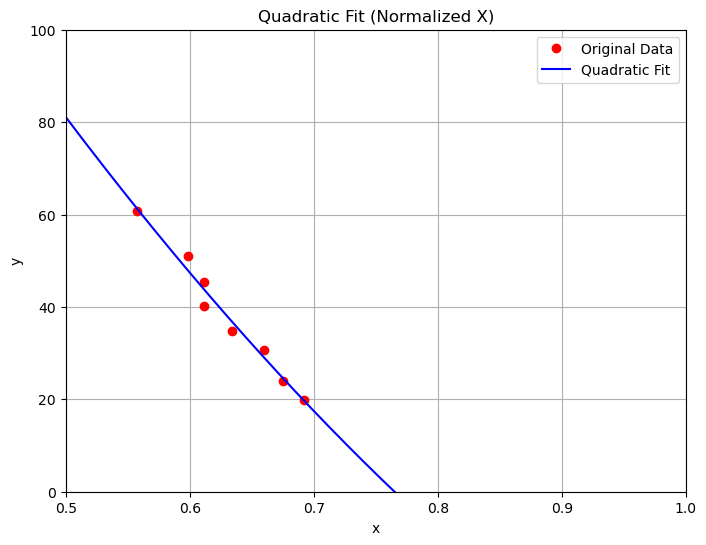

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 更新后的数据
x = np.array([0.69181597, 0.67528677, 0.65990662, 0.63425764,
              0.61163317, 0.61134261, 0.59841906, 0.5573305])
y = np.array([19.84, 24.03, 30.58, 34.87, 40.1 , 45.48, 51.13, 60.68])


# 拟合二次方程
coeffs = np.polyfit(x, y, 2)  # 得到 a, b, c
poly = np.poly1d(coeffs)

# 打印拟合方程
print("拟合方程: y = {:.4f}x² + {:.4f}x + {:.4f}".format(*coeffs))

# 生成拟合曲线用的数据
x_fit = np.linspace(0.5, 1, 500)
y_fit = poly(x_fit)

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ro', label='Original Data')       # 原始数据点
plt.plot(x_fit, y_fit, 'b-', label='Quadratic Fit')  # 拟合曲线

# 设置坐标轴范围
plt.xlim(0.5, 1)
plt.ylim(0, 100)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Fit (Normalized X)')
plt.legend()
plt.grid(True)
plt.show()
